Shilpa Kolekar
Amazon Sentiment Analysis

In [60]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
#Load data into a dataframe
df = pd.read_csv('amazon_reviews.txt', '\t')

In [85]:
# Check first few rows of the data frame
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [86]:
# Check the shape of the data frame
df.shape

(21000, 9)

In [87]:
# Check the data types
df.dtypes

DOC_ID                int64
LABEL                object
RATING                int64
VERIFIED_PURCHASE    object
PRODUCT_CATEGORY     object
PRODUCT_ID           object
PRODUCT_TITLE        object
REVIEW_TITLE         object
REVIEW_TEXT          object
dtype: object

### Data Cleansing

In [88]:
# Check for any missing values in the data frame
df.isna().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [89]:
# Check for any null values in the data frame
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

#### Pre-processing of REVIEW_TEXT

In [90]:
# Convert all text in REVIEW_TEXT to lowercase letters. 
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].str.lower()

In [91]:
# Check the first few rows to confirm changes
df.REVIEW_TEXT.head()

0    when least you think so, this product will sav...
1    lithium batteries are something new introduced...
2    i purchased this swing for my baby. she is 6 m...
3    i was looking for an inexpensive desk calcolat...
4    i only use it twice a week and the results are...
Name: REVIEW_TEXT, dtype: object

In [92]:
# Remove all punctuation from REVIEW_TEXT using translate method
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].str.translate(str.maketrans('','',string.punctuation))

In [93]:
# Check the first few rows to confirm changes
df.REVIEW_TEXT.head()

0    when least you think so this product will save...
1    lithium batteries are something new introduced...
2    i purchased this swing for my baby she is 6 mo...
3    i was looking for an inexpensive desk calcolat...
4    i only use it twice a week and the results are...
Name: REVIEW_TEXT, dtype: object

In [94]:
# Download stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shilp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
# Load stop words
stop_words = stopwords.words('english')

In [96]:
#Remove stop words from REVIEW_TEXT by splitting the text, removing stop words, and then rejoining the text
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [97]:
# Check the first few rows to confirm changes
df.REVIEW_TEXT.head()

0    least think product save day keep around case ...
1    lithium batteries something new introduced mar...
2    purchased swing baby 6 months pretty much grow...
3    looking inexpensive desk calcolatur works ever...
4    use twice week results great used teeth whiten...
Name: REVIEW_TEXT, dtype: object

In [98]:
# Create a PorterStemmer instance
porter = PorterStemmer()

In [99]:
# Apply PorterStemmer to convert the words in REVIEW_TEXT to root form
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [100]:
# Check the first few rows to confirm changes
df.REVIEW_TEXT.head()

0    least think product save day keep around case ...
1    lithium batteri someth new introduc market ave...
2    purchas swing babi 6 month pretti much grown l...
3    look inexpens desk calcolatur work everyth nee...
4    use twice week result great use teeth whiten s...
Name: REVIEW_TEXT, dtype: object

### Exploratory Data Analysis

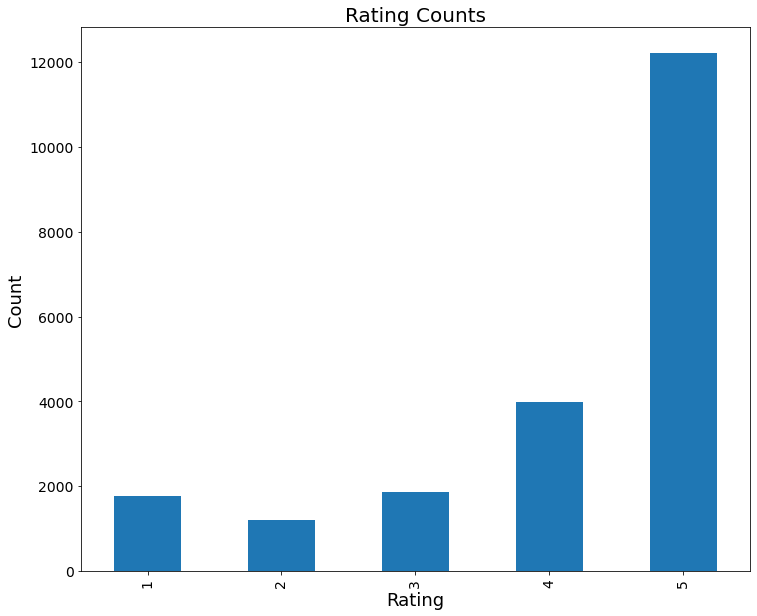

In [101]:
# Display bar chart of ratings
ax = df['RATING'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Rating Counts', fontsize=20)
ax.set_xlabel('Rating', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

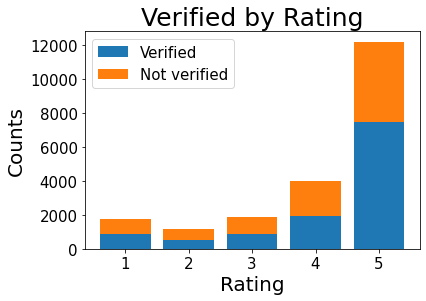

In [102]:
# Stacked bar chart to compare verified purchase/not verified purchase with Rating
rating_verified = df.replace({'VERIFIED_PURCHASE': {'Y': 'Verified', 'N': 'Not-verified'}})[df['VERIFIED_PURCHASE']=='Y']['RATING'].value_counts()
rating_not_verified = df.replace({'VERIFIED_PURCHASE': {'Y': 'Verified', 'N': 'Not-verified'}})[df['VERIFIED_PURCHASE']=='N']['RATING'].value_counts()
rating_not_verified = rating_not_verified.reindex(index = rating_verified.index)

# make the bar plot
p1 = plt.bar(rating_verified.index, rating_verified.values)
p2 = plt.bar(rating_not_verified.index, rating_not_verified.values, bottom=rating_verified.values)
plt.title('Verified by Rating', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend((p1[0], p2[0]), ('Verified', 'Not verified'), fontsize = 15)
plt.show()

In [103]:
# Combine ratings 1 and 2 as negative sentiments, combine 4 and 5 as positive sentiments, and retain 3 as newutral sentiments 
df["RATING"] = df["RATING"].replace(2 , 1)
df["RATING"] = df["RATING"].replace(4 , 5)

In [104]:
# Check the counts of 1 (negative), 3 (neutral), and 5 (positive) sentiments
df.RATING.value_counts()

5    16183
1     2949
3     1868
Name: RATING, dtype: int64

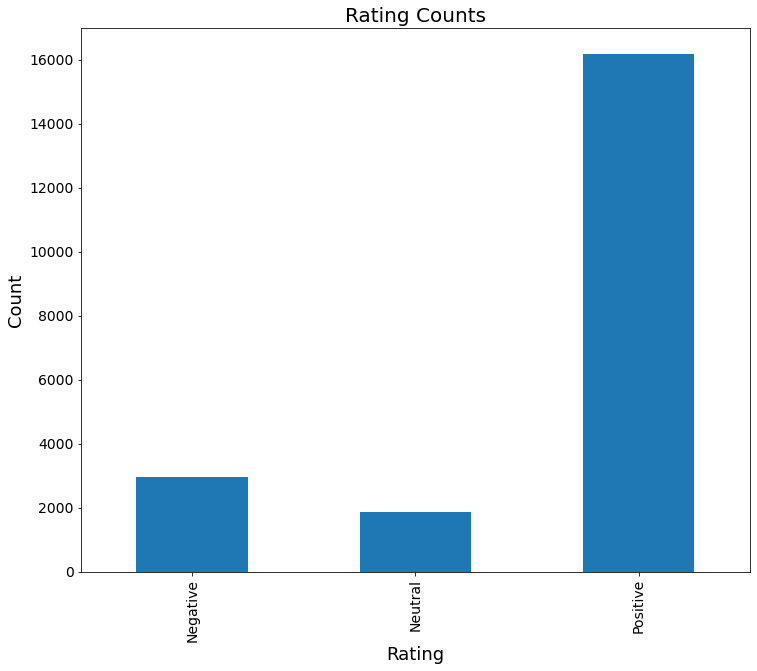

In [105]:
# Display bar chart of ratings after conversion
ax = df['RATING'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Rating Counts', fontsize=20)
ax.set_xlabel('Rating', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.xticks([0,1,2], ['Negative','Neutral','Positive'])
plt.show()

### Random Forest Classifier using Count Vectorizer

In [106]:
# Create text data
text_data = np.array(df['REVIEW_TEXT'])

In [107]:
# Create bag of words feature matrix
count = CountVectorizer()
X = count.fit_transform(text_data)
y = df.RATING

In [108]:
# Create train and test split with 75% train data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [109]:
# Instantiate the classification model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
# Create predictions
predictions = rf_model.predict(X_test)

In [111]:
# Create confusion matrix
print(confusion_matrix(y_test, predictions))

[[ 164    0  557]
 [  18    1  438]
 [   8    0 4064]]


In [112]:
# Print Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.86      0.23      0.36       721
           3       1.00      0.00      0.00       457
           5       0.80      1.00      0.89      4072

    accuracy                           0.81      5250
   macro avg       0.89      0.41      0.42      5250
weighted avg       0.83      0.81      0.74      5250



In [113]:
# Calculate Accuracy Score
print(accuracy_score(y_test, predictions))

0.8055238095238095


### Logistic Regression using Count Vectorizer

In [114]:
# Instantiate the classification model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [115]:
# Create predictions
predictions = lr_model.predict(X_test)

In [116]:
# Create confusion matrix
print(confusion_matrix(y_test, predictions))

[[ 424   58  239]
 [  97   59  301]
 [ 121  102 3849]]


In [117]:
# Print Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.59      0.62       721
           3       0.27      0.13      0.17       457
           5       0.88      0.95      0.91      4072

    accuracy                           0.83      5250
   macro avg       0.60      0.55      0.57      5250
weighted avg       0.79      0.83      0.81      5250



In [118]:
# Calculate Accuracy Score
print(accuracy_score(y_test, predictions))

0.8251428571428572


### Random Forest Classifier using TF-IDF Vectorizer

In [119]:
# Initialize Vectorizer
vectorizer = TfidfVectorizer()

# Fit Vectorizer 
X = vectorizer.fit_transform(df['REVIEW_TEXT'])
y = df['RATING']

In [120]:
# Create train and test split with 75% train data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [121]:
# Instantiate the classification model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
# Create predictions
predictions = rf_model.predict(X_test)

In [123]:
# Create confusion matrix
print(confusion_matrix(y_test, predictions))

[[ 154    0  567]
 [  24    1  432]
 [   7    0 4065]]


In [124]:
# Print Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.83      0.21      0.34       721
           3       1.00      0.00      0.00       457
           5       0.80      1.00      0.89      4072

    accuracy                           0.80      5250
   macro avg       0.88      0.40      0.41      5250
weighted avg       0.82      0.80      0.74      5250



In [125]:
# Calculate Accuracy Score
print(accuracy_score(y_test, predictions))

0.8038095238095239


### Logistic Regression using TF-IDF Vectorizer

In [126]:
# Instantiate the classification model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [127]:
# Create predictions
predictions = lr_model.predict(X_test)

In [128]:
# Create confusion matrix
print(confusion_matrix(y_test, predictions))

[[ 304    3  414]
 [  62    7  388]
 [  39    6 4027]]


In [129]:
# Print Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.42      0.54       721
           3       0.44      0.02      0.03       457
           5       0.83      0.99      0.90      4072

    accuracy                           0.83      5250
   macro avg       0.67      0.48      0.49      5250
weighted avg       0.79      0.83      0.78      5250



In [130]:
# Calculate Accuracy Score
print(accuracy_score(y_test, predictions))

0.8262857142857143
